In [87]:
import pandas as pd
data = pd.read_csv('winequality-red.csv',sep=';')
import numpy as np
data = np.array(data)
print(data)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [88]:
#Count the sample size for different categories by the last column
count = np.array([0]*10)
for i in range(len(data)):
    count[int(data[i][-1])] = count[int(data[i][-1])] + 1
#打印每个类别的样本数量->仅仅针对较多的类别进行预测
print(count)

[  0   0   0  10  53 681 638 199  18   0]


In [89]:
#划分数据集为1:4,使用numpy的random.shuffle()函数
np.random.shuffle(data)
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
print(train_data,len(train_data))
print(test_data,len(test_data))
n = train_data.shape[1]
print(n)

[[ 8.6    0.49   0.28  ...  1.95   9.9    6.   ]
 [ 9.5    0.735  0.1   ...  0.56  10.1    6.   ]
 [ 6.7    0.54   0.13  ...  0.64   9.8    5.   ]
 ...
 [ 7.3    0.38   0.21  ...  0.47   9.5    5.   ]
 [ 6.1    0.715  0.1   ...  0.5   11.9    5.   ]
 [ 8.3    0.675  0.26  ...  0.53   9.2    4.   ]] 1279
[[10.1   0.45  0.23 ...  0.65  9.3   6.  ]
 [ 5.9   0.19  0.21 ...  0.44  9.5   5.  ]
 [11.2   0.28  0.56 ...  0.58  9.8   6.  ]
 ...
 [ 8.7   0.29  0.52 ...  0.58  9.5   5.  ]
 [ 7.6   0.41  0.24 ...  0.59  9.5   5.  ]
 [ 7.8   0.87  0.26 ...  0.46  9.2   5.  ]] 320
12


In [90]:
#定义feature项为前8列，label项为最后一列
train_feature = train_data[:,:-1]
#再次切分出train_feature的前8列为train_feature1
train_label = train_data[:,-1]
test_feature = test_data[:,:-1]
test_label = test_data[:,-1]
#print(train_feature)
#获取列数
n = train_feature.shape[1]
print(n)

11


In [91]:
%%script false
#加入PCA主成分分析把变量降维
def PCA(data,k):
    #计算协方差矩阵
    cov = np.cov(data.T)
    #计算特征值和特征向量
    eig_val,eig_vec = np.linalg.eig(cov)
    #对特征值进行排序
    eig_val_index = np.argsort(eig_val)
    #取最大的k个特征值对应的特征向量
    eig_vec1 = eig_vec[:,eig_val_index[:-k-1:-1]]
    #将数据转换到新的空间
    data1 = np.dot(data,eig_vec1)
    return data1


Couldn't find program: 'false'


In [92]:

#train_feature = PCA(train_feature,10)
#test_feature = PCA(test_feature,10)

In [93]:
#定义一个新的numpy数组,将train_label转换为one-hot编码,打印数据的形状
train_label1 = np.zeros((len(train_label),10))
for i in range(len(train_label)):
    train_label1[i][int(train_label[i])] = 1
print(train_label1)
print(train_label1.shape)
#定义一个新的numpy数组,将test_label转换为one-hot编码
test_label1 = np.zeros((len(test_label),10))
for i in range(len(test_label)):
    test_label1[i][int(test_label[i])] = 1
print(test_label1)
print(test_label1.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1279, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(320, 10)


In [94]:
#取出train_label1中的第一列
print(train_label1[:,0])
#返回train_label1中的第一列的形状
print(train_label1[:,0].shape)

[0. 0. 0. ... 0. 0. 0.]
(1279,)


In [95]:
#定义线性回归模型
def modelforlinear(X,theta):
    return np.dot(X,theta.T)

In [ ]:
#直接用train_feature和train_label和最小二乘法求解线性回归模型
def linear_regression(X,y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta
theata = linear_regression(train_feature,train_label)
print(theata.shape)

In [97]:
#在测试集上计算准确率
def predictforlinear(X,theta):
    y_pred = np.dot(X,theta.T)
    #对比预测值和真实值，相差小于0.5的为1，相差大于0.5的为0
    result = [1 if x>=0.5 else 0 for x in y_pred-test_label]
    #计算准确率
    accuracy = sum(result)/len(X)
    return accuracy

accuracy = predictforlinear(test_feature,theata)
print("The accuracy for the Linearprediction is",accuracy)

The accuracy for the Linearprediction is 0.209375


The result is not very good. We can try to use logistic regression to do the same task.

For linear regression, sigmoid is not necessary. But for logistic regression, sigmoid is necessary.

In [98]:
#定义一个激活函数
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [99]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))

In [100]:

#将训练集和测试集标准化
train_feature = (train_feature - np.mean(train_feature,axis=0))/np.std(train_feature,axis=0)
test_feature = (test_feature - np.mean(test_feature,axis=0))/np.std(test_feature,axis=0)
print(train_feature)
print(test_feature)
#打印数据的形状
print(train_feature.shape)
print(test_feature.shape)

[[ 1.62664276e-01 -2.34560513e-01  6.25444846e-02 ... -2.42922384e+00
   7.50421265e+00 -4.73040376e-01]
 [ 6.76080367e-01  1.14898225e+00 -8.58107129e-01 ... -5.12164981e-01
  -5.65239767e-01 -2.85097749e-01]
 [-9.21214137e-01  4.77951539e-02 -7.04665194e-01 ...  1.91610957e+00
  -1.00810851e-01 -5.67011689e-01]
 ...
 [-5.78936744e-01 -8.55742980e-01 -2.95486699e-01 ...  1.26854637e-01
  -1.08772230e+00 -8.48925630e-01]
 [-1.26349153e+00  1.03603999e+00 -8.58107129e-01 ...  1.66050172e+00
  -9.13561454e-01  1.40638590e+00]
 [-8.47442075e-03  8.10155454e-01 -3.97501392e-02 ... -9.49286376e-04
  -7.39400610e-01 -1.13083957e+00]]
[[ 1.04222391 -0.33900192 -0.28145665 ... -0.65334689 -0.07152445
  -1.12645232]
 [-1.44313616 -1.73875178 -0.38612385 ...  0.03461298 -1.40294918
  -0.93891376]
 [ 1.69315155 -1.25422298  1.44555217 ... -1.06612282 -0.51533269
  -0.65760592]
 ...
 [ 0.21377055 -1.20038645  1.23621777 ... -0.44695893 -0.51533269
  -0.93891376]
 [-0.43715708 -0.55434805 -0.229123

In [101]:
#往数据中加入一列1
train_feature = np.hstack((np.ones((len(train_feature),1)),train_feature))
print(train_feature)
test_feature = np.hstack((np.ones((len(test_feature),1)),test_feature))
print(train_feature.shape)
#初始化theta,针对每个类别都有一个theta
theta = np.zeros((10,n+1))

[[ 1.00000000e+00  1.62664276e-01 -2.34560513e-01 ... -2.42922384e+00
   7.50421265e+00 -4.73040376e-01]
 [ 1.00000000e+00  6.76080367e-01  1.14898225e+00 ... -5.12164981e-01
  -5.65239767e-01 -2.85097749e-01]
 [ 1.00000000e+00 -9.21214137e-01  4.77951539e-02 ...  1.91610957e+00
  -1.00810851e-01 -5.67011689e-01]
 ...
 [ 1.00000000e+00 -5.78936744e-01 -8.55742980e-01 ...  1.26854637e-01
  -1.08772230e+00 -8.48925630e-01]
 [ 1.00000000e+00 -1.26349153e+00  1.03603999e+00 ...  1.66050172e+00
  -9.13561454e-01  1.40638590e+00]
 [ 1.00000000e+00 -8.47442075e-03  8.10155454e-01 ... -9.49286376e-04
  -7.39400610e-01 -1.13083957e+00]]
(1279, 12)


The cost function in linear regression is:
$$(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$

In [102]:
#定义线性回归的损失函数
def costforlinear(X,y,theta):
    return np.sum(np.power((model(X,theta)-y),2))/(2*len(X))

The cost function in logistic regression is:
$$(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$


In [103]:
#定义损失函数
def cost(X,y,theta):
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/len(X)

In [104]:
#对train_label1中的每一个类别计算损失函数
for i in range(10):
    print(train_label1[:,i],theta[i],cost(train_feature,train_label1[:,i],theta[i]))

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 1. ... 1. 1. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[1. 1. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454
[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.6931471805599454


Gradient descent is:
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [105]:
#定义梯度
def gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-y).ravel()
   # print(theta.ravel())
    for j in range(len(theta.ravel())):#ravel()将多维数组降为一维
        term = np.multiply(error,X[:,j])#multiply()对应元素相乘
        grad[j] = np.sum(term)/len(X)
    return grad

In [106]:
import time
#定义梯度下降函数
def descent(X,y,theta,alpha=0.01,epochs=10000):
    #定义一个列表用来保存损失函数的值
    costs = []
    for i in range(epochs):
        grad = gradient(X,y,theta)
        theta = theta - alpha*grad
        costs.append(cost(X,y,theta))
    return theta,costs

第0类 [-4.56902896e+00 -3.43476456e-14 -7.07940265e-15 -8.09281129e-15
 -1.85645918e-14 -6.97661892e-16  1.23125692e-15  1.14109530e-15
  7.12899958e-14 -5.25649132e-15 -5.96177905e-15  2.98105437e-14]
第1类 [-4.56902896e+00 -3.43476456e-14 -7.07940265e-15 -8.09281129e-15
 -1.85645918e-14 -6.97661892e-16  1.23125692e-15  1.14109530e-15
  7.12899958e-14 -5.25649132e-15 -5.96177905e-15  2.98105437e-14]
第2类 [-4.56902896e+00 -3.43476456e-14 -7.07940265e-15 -8.09281129e-15
 -1.85645918e-14 -6.97661892e-16  1.23125692e-15  1.14109530e-15
  7.12899958e-14 -5.25649132e-15 -5.96177905e-15  2.98105437e-14]
第3类 [-4.37421347  0.11985573  0.38226002  0.05419713  0.00442873  0.24958183
 -0.02746693 -0.1686828   0.09645232  0.13197965 -0.1454301  -0.05163953]
第4类 [-3.63391228  0.04361096  0.54746316 -0.07000613  0.30919949  0.17248565
 -0.36000847 -0.21528983 -0.11943309  0.22622558 -0.00891534 -0.06636223]
第5类 [-0.41094225 -0.36637553  0.37097403  0.1705876  -0.17264064  0.04449659
 -0.17095051  0.53924

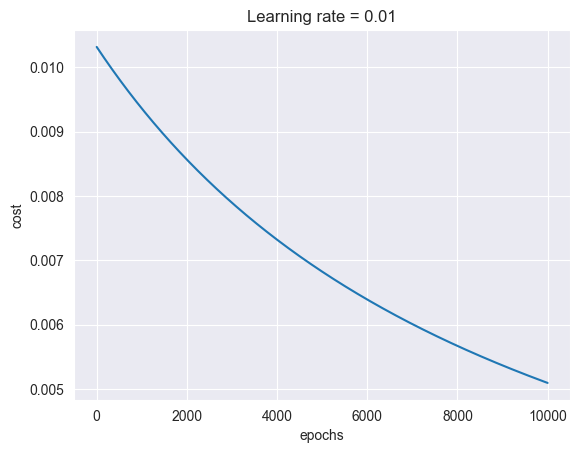

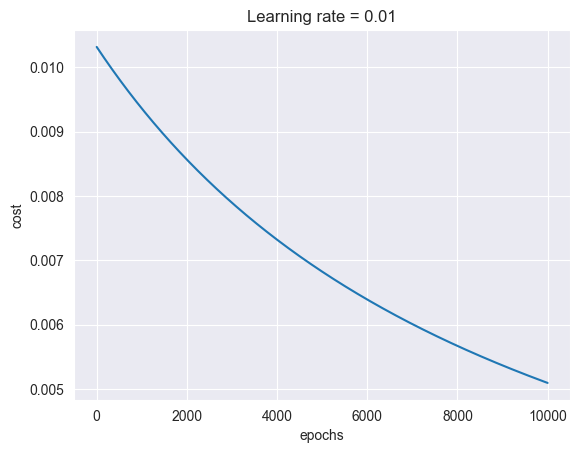

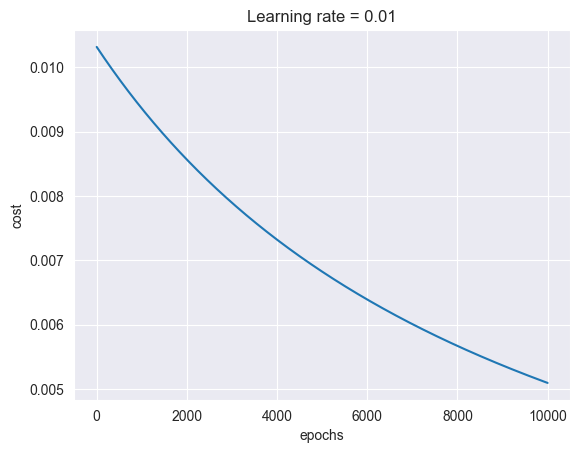

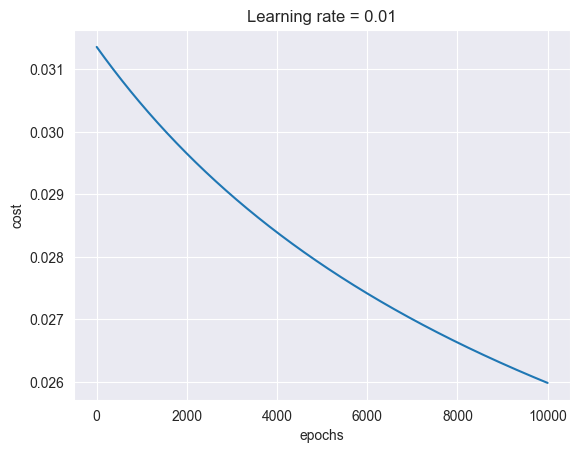

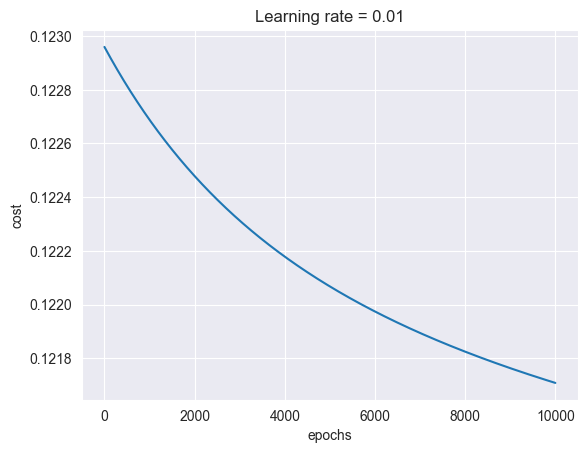

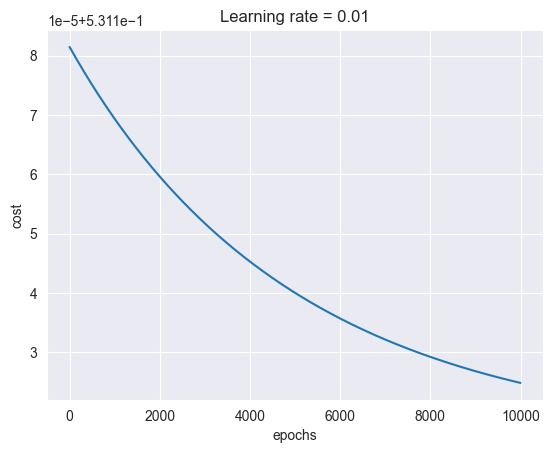

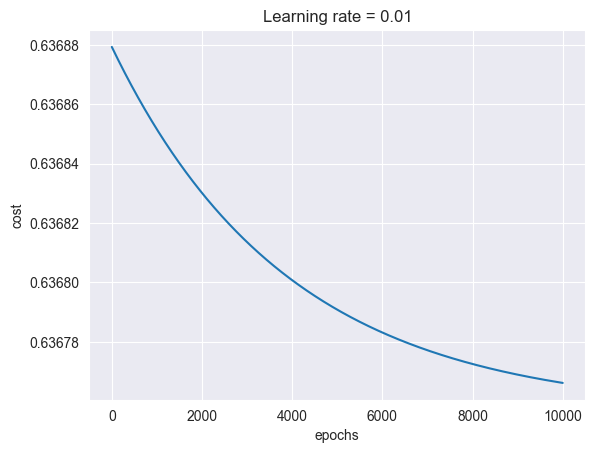

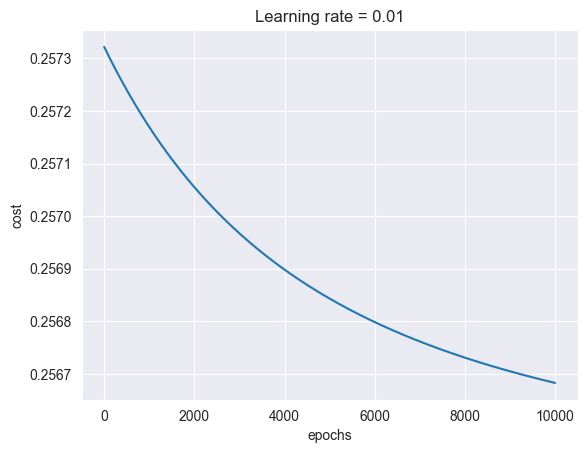

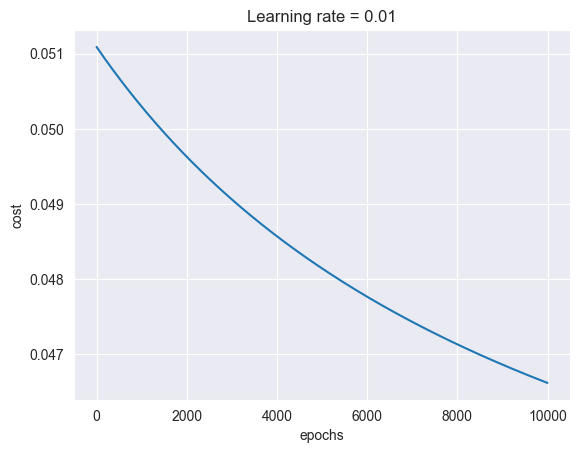

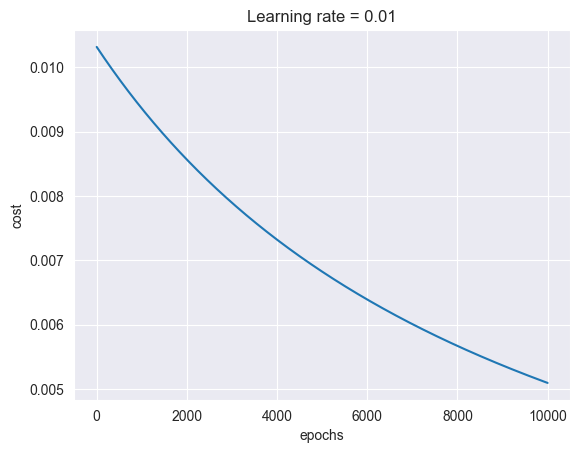

In [107]:
#开始训练,对每个类别都训练一个theta
import matplotlib.pyplot as plt
start = time.time()
costs = []
for i in range(10):
    #一般梯度下降算法
    theta[i] = descent(train_feature,train_label1[:,i],theta[i])[0]
    costs.append(descent(train_feature,train_label1[:,i],theta[i])[1])
    #线性回归算法
    #theta[i] = descentforlinear(train_feature,train_label1[:,i],theta[i])[0]
    #costs.append(descentforlinear(train_feature,train_label1[:,i],theta[i])[1])
    #随机梯度下降算法
    #theta[i] = stoc_descent(train_feature,train_label1[:,i],theta[i])[0]
    #costs.append(stoc_descent(train_feature,train_label1[:,i],theta[i])[1])
    print('第%d类'%i,theta[i])
end = time.time()
print('训练时间为：',end-start)
#绘制损失函数的变化曲线,对每个类别都绘制一条曲线，分开绘制
for i in range(10):
    plt.plot(costs[i])
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.title('Learning rate = 0.01')
    plt.show()

Now the logistic regression model is trained. We can use the model to predict the test set.

In [108]:
#设定阈值,大于阈值的为1,小于阈值的为0
def predict(X,theta):
    return [1 if x>=0.5 else 0 for x in model(X,theta)]

In [109]:
#针对每个测试集的每个类别都进行预测，并将预测结果保存在一个列表中，计算准确率
def accuracy(X,y,theta):
    correct = [1 if a==b else 0 for (a,b) in zip(predict(X,theta),y)]#zip()将对象中对应的元素打包成一个个元组
   # print(zip(predict(X,theta),y))
    return sum(correct)/len(X)


In [110]:
#在测试集上计算准确率,对每个类别都计算一次准确率,并求平均值
accuracy_avg = 0
for i in range(10):
    print('第%d类'%i,accuracy(test_feature,test_label1[:,i],theta[i]))
    accuracy_avg += accuracy(test_feature,test_label1[:,i],theta[i])
print('平均准确率为：',accuracy_avg/10)

第0类 1.0
第1类 1.0
第2类 1.0
第3类 0.990625
第4类 0.9625
第5类 0.740625
第6类 0.5875
第7类 0.865625
第8类 0.9875
第9类 1.0
平均准确率为： 0.9134375


Now we finish utilizing the logistic regression model to do multi-classification. The accuracys for some specific classifications are not very high. We can try to use another method to do the same task.

In [111]:
#定义带正则化的损失函数
def cost_reg(X,y,theta,lamda=0.1):
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    reg = (lamda/(2*len(X)))*np.sum(np.power(theta[1:],2))
    return np.sum(left-right)/len(X)+reg

In [112]:
#随机梯度下降法的梯度，每次只取一个样本,X是1*12的矩阵
def stoc_gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[j])
        grad[j] = np.sum(term)
    return grad

In [113]:
#计算带正则化的梯度,针对随机梯度下降法
def stoc_gradient_reg(X,y,theta,lamda=0.1):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[j])
        if j==0:
            grad[j] = np.sum(term)
        else:
            grad[j] = np.sum(term)+lamda*theta[j]
    return grad

In [114]:
import time
#定义梯度下降函数
def descent(X,y,theta,alpha=0.01,epochs=10000):
    #定义一个列表用来保存损失函数的值
    costs = []
    for i in range(epochs):
        grad = gradient(X,y,theta)
        theta = theta - alpha*grad
        costs.append(cost(X,y,theta))
    return theta,costs

In [115]:
#定义带正则化的随机梯度下降函数
def stoc_descent_reg(X,y,theta,alpha=0.01,epochs=10000):
    costs = []
    #从X中随机取出一个样本
    #初始化x
    x = np.zeros((1,X.shape[1]))#X.shape[1]取出X的列数
    for i in range(epochs):
         #随机化样本的索引
         j = np.random.randint(0,len(X))
         x=X[j]
         grad = stoc_gradient_reg(x,y[j],theta)
         theta = theta - alpha*grad
         costs.append(cost_reg(x,y[j],theta))
    return theta,costs

第0类 [-5.27687586e+00  8.64572737e-04 -3.67982973e-04  9.91856426e-04
 -1.98978528e-04  1.18612469e-03 -3.19924426e-04  5.93195608e-04
 -2.92810774e-04 -9.69472830e-04 -2.30576690e-04  2.17724323e-04]
第1类 [-5.27685942e+00  6.77611555e-04  4.08002922e-04  1.10477091e-04
 -4.44015753e-04  3.08397172e-04 -3.58863749e-04 -6.25466324e-04
  1.06487485e-03  1.12144562e-03 -1.15936483e-04 -9.38214688e-04]
第2类 [-5.27682045e+00 -2.03453714e-03 -6.16873835e-04 -1.15929075e-04
 -2.35019787e-04  5.32410184e-04  9.19635206e-04  1.29538017e-03
 -1.61672492e-03  1.48260739e-04 -2.38515046e-04 -8.77783583e-04]
第3类 [-4.78351252  0.00971648  0.11446334 -0.02773948 -0.00771629  0.09922624
 -0.00800498 -0.04365451  0.01128404  0.02882883 -0.02980957 -0.01820286]
第4类 [-3.51338018e+00 -4.93820263e-02  2.57842819e-01 -1.29695751e-01
  9.37170042e-02 -1.53533708e-02 -1.27147044e-01 -4.95213997e-02
 -1.13708636e-03  1.22431292e-01 -1.08524527e-01 -4.24965352e-03]
第5类 [-0.34008778 -0.15520409  0.26754153 -0.09392

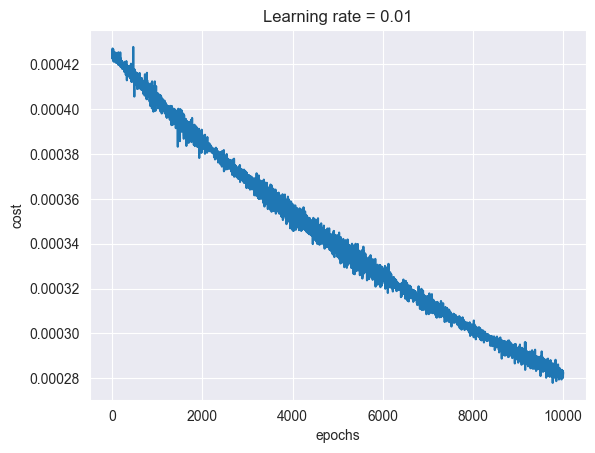

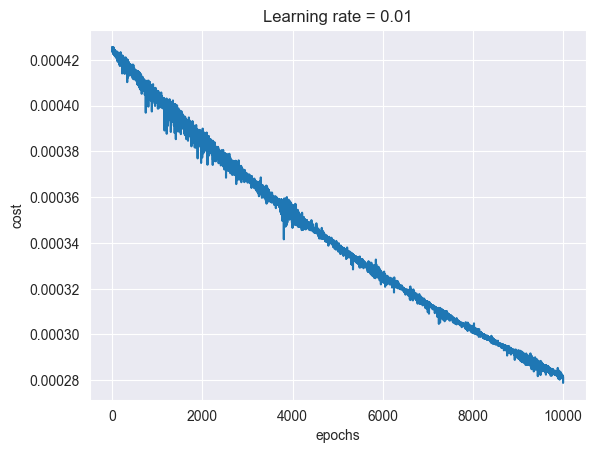

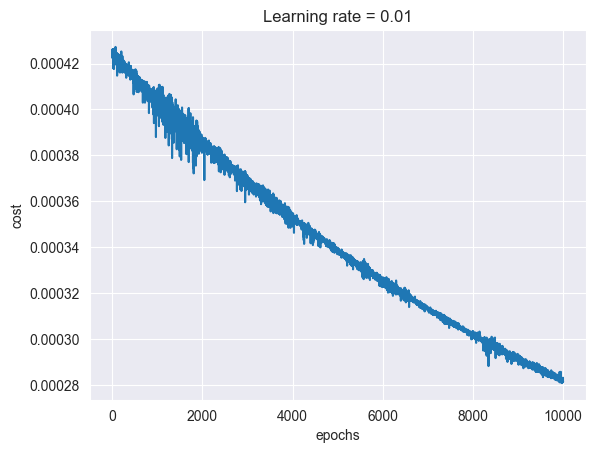

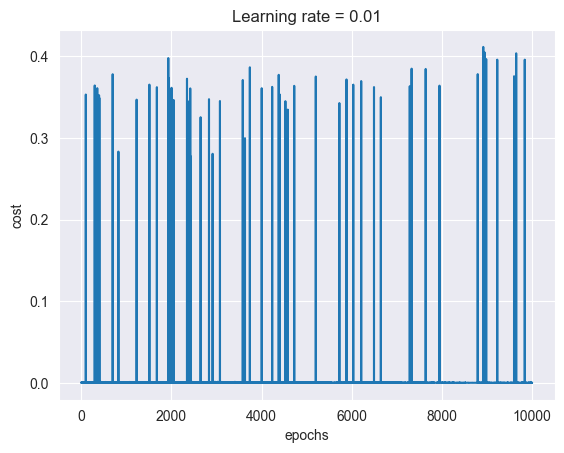

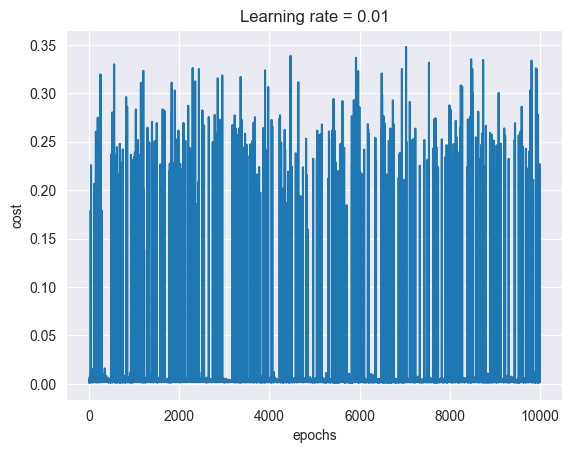

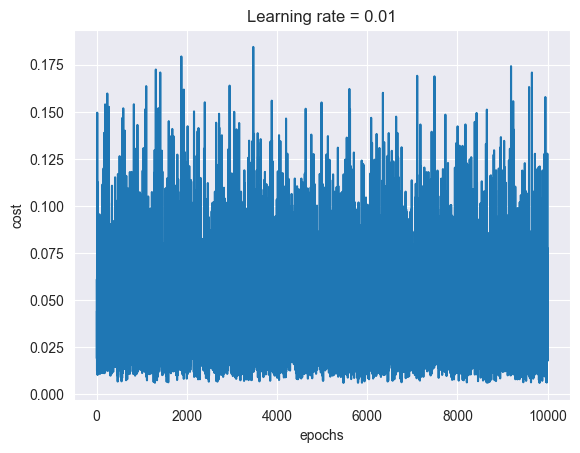

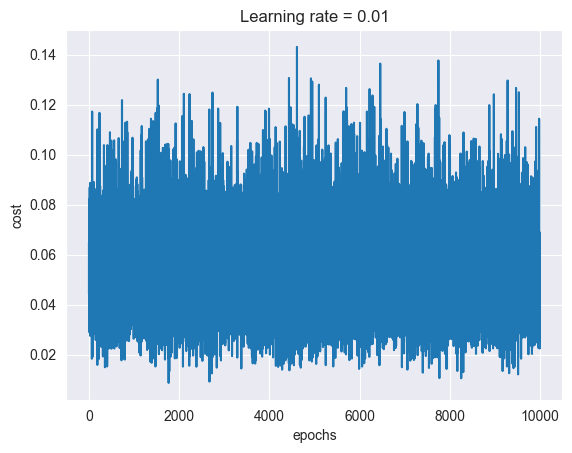

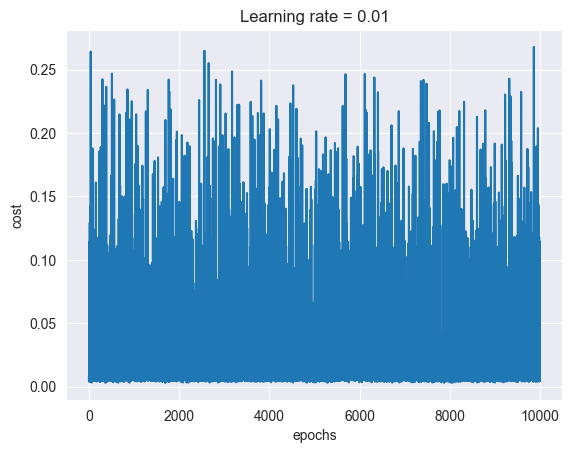

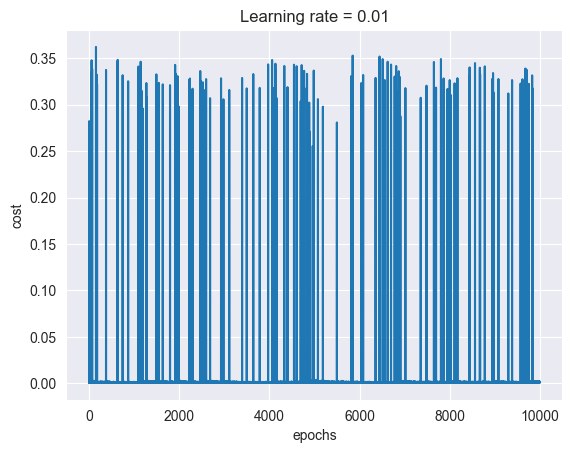

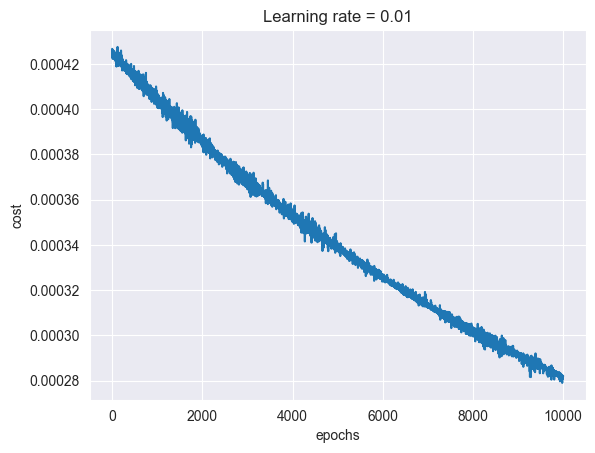

In [116]:
#开始训练,对每个类别都训练一个theta
import matplotlib.pyplot as plt
start = time.time()
costs = []
for i in range(10):
    theta[i] = stoc_descent_reg(train_feature,train_label1[:,i],theta[i])[0]
    costs.append(stoc_descent_reg(train_feature,train_label1[:,i],theta[i])[1])
    print('第%d类'%i,theta[i])
end = time.time()
print('训练时间为：',end-start)
#绘制损失函数的变化曲线,对每个类别都绘制一条曲线，分开绘制
for i in range(10):
    plt.plot(costs[i])
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.title('Learning rate = 0.01')
    plt.show()

In [117]:
#设定阈值,大于阈值的为1,小于阈值的为0
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]


#针对每个测试集的每个类别都进行预测，并将预测结果保存在一个列表中，计算准确率
def accuracy(X, y, theta):
    correct = [1 if a == b else 0 for (a, b) in zip(predict(X, theta), y)]  #zip()将对象中对应的元素打包成一个个元组
    # print(zip(predict(X,theta),y))
    return sum(correct) / len(X)


#在测试集上计算准确率,对每个类别都计算一次准确率,并求平均值
accuracy_avg = 0
for i in range(10):
    print('第%d类' % i, accuracy(test_feature, test_label1[:, i], theta[i]))
    accuracy_avg += accuracy(test_feature, test_label1[:, i], theta[i])
print('平均准确率为：', accuracy_avg / 10)

第0类 1.0
第1类 1.0
第2类 1.0
第3类 0.990625
第4类 0.9625
第5类 0.7375
第6类 0.5625
第7类 0.871875
第8类 0.9875
第9类 1.0
平均准确率为： 0.9112500000000001


In [118]:
#定义一个针对随机梯度下降的梯度函数,由于随机梯度下降算法每次只使用一个样本，所以这里的梯度函数只计算一个样本的梯度
def stoc_gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[:,j])
        #转变格式为numpy数组
        grad[j] = np.sum(term)/len(X)
    return grad

In [119]:
#定义小样本梯度下降函数,利用切片操作，随机切分原本样本的一部分作为新的样本，新的样本计算方式和原本样本一样
def minibatch_descent(X,y,theta,alpha=0.01,epochs=10000):
    costs = []
    for i in range(epochs):
            index = np.random.randint(0,len(X))
            X1 = X[index,:].reshape(1,X.shape[1])
            y1 = y[index].reshape(1,1)
            grad = stoc_gradient(X1,y1,theta)
            theta = theta - alpha*grad
            costs.append(cost(X1,y1,theta))
    return theta,costs

第0类 [-5.68817838e+00 -1.27844100e-03 -6.54291066e-04 -8.17887488e-04
  1.30282189e-03 -4.94525079e-03  1.51169099e-03  4.75663966e-04
 -5.86174290e-03  1.19693505e-03 -2.45507420e-03  4.00822095e-03]
第1类 [-5.68817181e+00  1.59085910e-03  1.90174483e-03  1.81437837e-03
 -3.69469178e-03 -1.05920832e-03 -6.90312500e-03  1.23537610e-03
 -1.60505085e-03 -2.15241823e-03 -3.77848124e-03 -1.38071739e-04]
第2类 [-5.68815332e+00 -4.41177399e-03  5.00945819e-04 -2.75338325e-04
  1.93430460e-03  2.02549163e-03  5.62716540e-04 -9.21087495e-04
  1.14252880e-03  2.74699575e-03  5.56810642e-03 -4.43219484e-03]
第3类 [-5.19142102e+00  1.28751448e-01  5.57004409e-01 -2.61663708e-02
 -4.83985100e-03  3.10182639e-01 -3.29144411e-02 -2.08462342e-01
  1.11761511e-01  1.54094731e-01 -1.86063779e-01 -3.29802722e-02]
第4类 [-3.94496003 -0.04236892  0.59745686 -0.25583381  0.31251451  0.08818028
 -0.61943086 -0.26437017 -0.21249359  0.23728103 -0.19089082 -0.02736943]
第5类 [-0.35431447 -0.47913954  0.29085125  0.07280

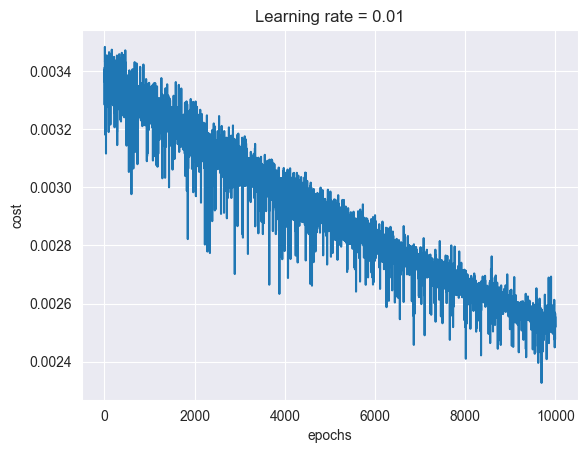

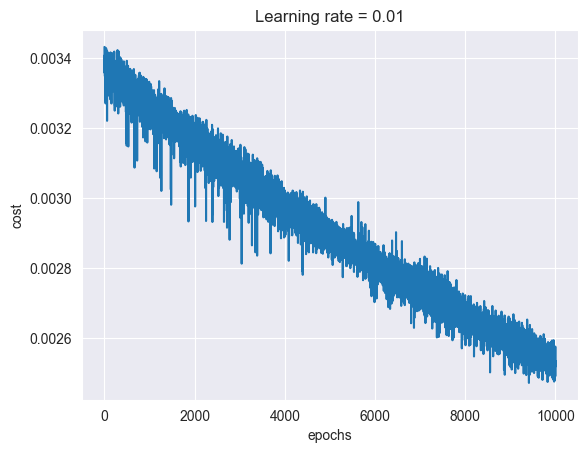

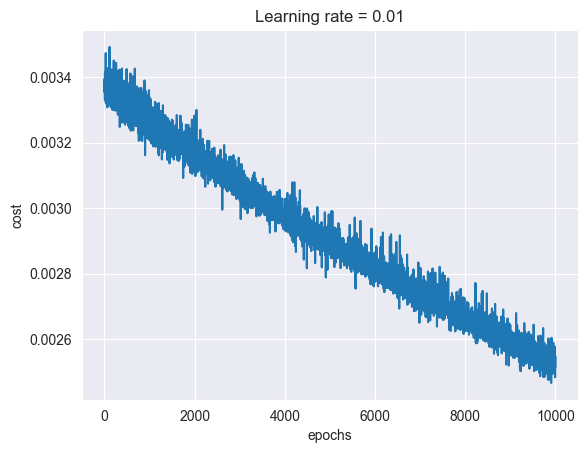

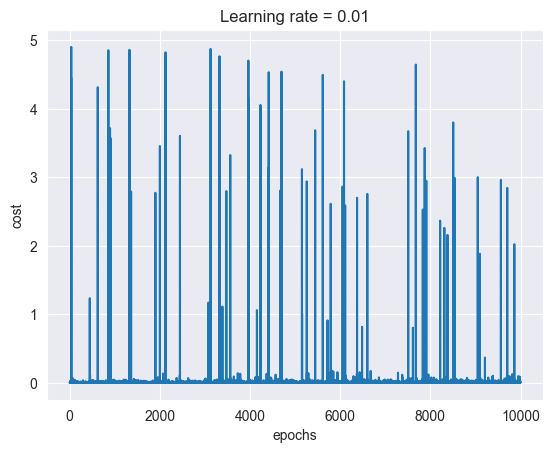

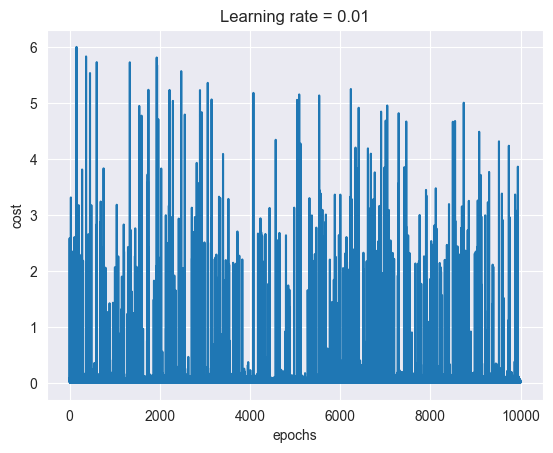

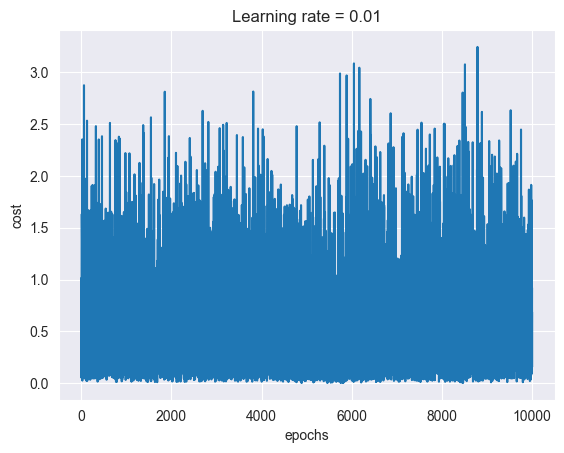

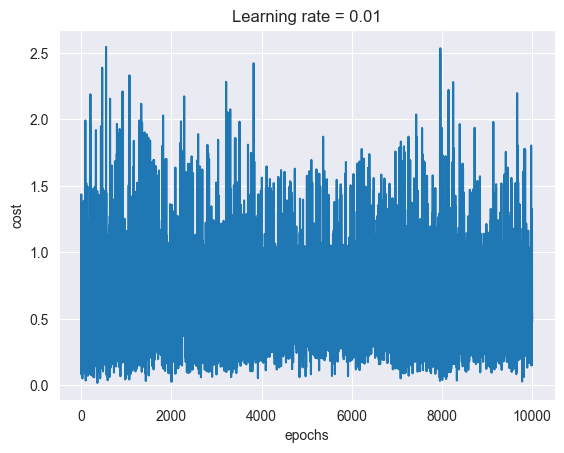

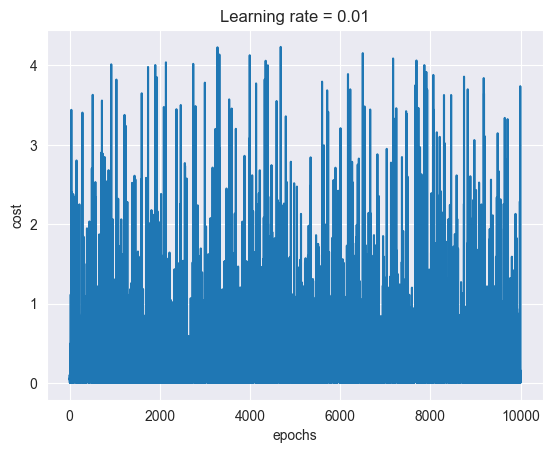

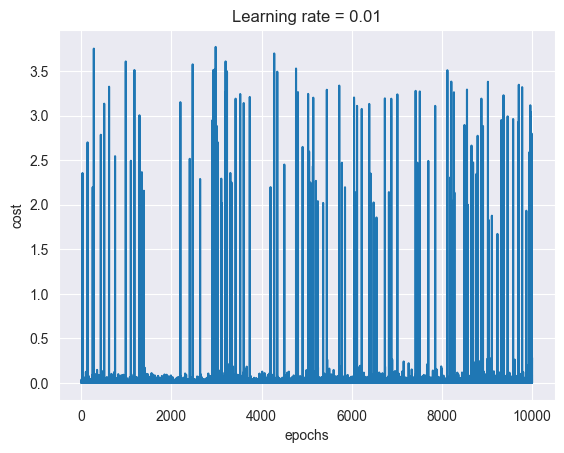

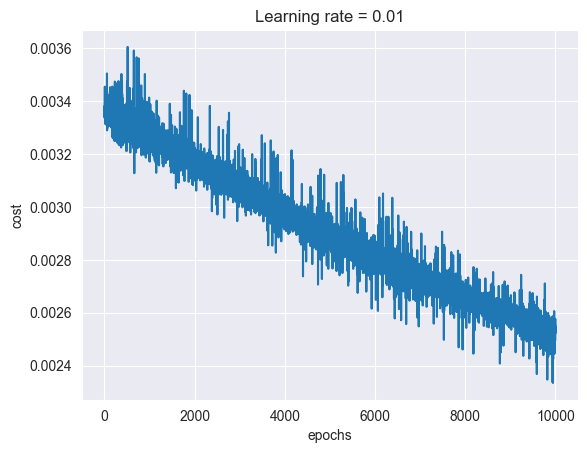

In [120]:
#开始训练,对每个类别都训练一个theta
import matplotlib.pyplot as plt
start = time.time()
costs = []
for i in range(10):
    #一般梯度下降算法
    #theta[i] = descent(train_feature,train_label1[:,i],theta[i])[0]
    #costs.append(descent(train_feature,train_label1[:,i],theta[i])[1])
    #随机梯度下降算法
    theta[i] = minibatch_descent(train_feature,train_label1[:,i],theta[i])[0]
    costs.append(minibatch_descent(train_feature,train_label1[:,i],theta[i])[1])
    print('第%d类'%i,theta[i])
end = time.time()
print('训练时间为：',end-start)
#绘制损失函数的变化曲线,对每个类别都绘制一条曲线，分开绘制
for i in range(10):
    plt.plot(costs[i])
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.title('Learning rate = 0.01')
    plt.show()

In [121]:
#设定阈值,大于阈值的为1,小于阈值的为0
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]


#针对每个测试集的每个类别都进行预测，并将预测结果保存在一个列表中，计算准确率
def accuracy(X, y, theta):
    correct = [1 if a == b else 0 for (a, b) in zip(predict(X, theta), y)]  #zip()将对象中对应的元素打包成一个个元组
    # print(zip(predict(X,theta),y))
    return sum(correct) / len(X)


#在测试集上计算准确率,对每个类别都计算一次准确率,并求平均值
accuracy_avg = 0
for i in range(10):
    print('第%d类' % i, accuracy(test_feature, test_label1[:, i], theta[i]))
    accuracy_avg += accuracy(test_feature, test_label1[:, i], theta[i])
print('平均准确率为：', accuracy_avg / 10)

第0类 1.0
第1类 1.0
第2类 1.0
第3类 0.990625
第4类 0.959375
第5类 0.7375
第6类 0.571875
第7类 0.88125
第8类 0.9875
第9类 1.0
平均准确率为： 0.9128125


In [122]:
#用sklearn中的线性回归和逻辑回归模型进行预测
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LinearRegression()
lr.fit(train_feature,train_label)
y_pred = lr.predict(test_feature)
print(accuracy_score(test_label,y_pred.round()))
lr1 = LogisticRegression()
lr1.fit(train_feature,train_label)
y_pred1 = lr1.predict(test_feature)
print(accuracy_score(test_label,y_pred1.round()))

0.60625
0.578125


D:\conda_envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
